In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [93]:
!pip install xgboost

In [94]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [3]:
file=pd.read_csv('iris.csv')
file.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
x=file.iloc[:,:-1]
y=file.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
le=LabelEncoder()
ss=StandardScaler()

In [7]:
y=le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [9]:
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

In [10]:
#linear regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr=LinearRegression()
lr_fit=lr.fit(xtrain,ytrain)
lr_predict=lr_fit.predict(xtest)
lr_predict

array([ 2.07863376,  0.96669898, -0.15934059,  1.82209546, -0.03128655,
        2.29167009, -0.03326614,  1.30556458,  1.26630691,  1.10590682,
        1.61291114,  1.29882172,  1.24583575,  1.31726102,  1.35560867,
       -0.06446882,  1.37252277,  1.26780932,  0.03810685, -0.05301757,
        1.83345137,  1.43872911,  0.11461187,  0.05223725,  1.59172014,
       -0.1067769 ,  0.16770375,  1.17090695,  0.93927314,  0.10832465,
        1.74781133,  1.47276913, -0.06720024,  1.6329574 ,  2.00469015,
        1.28881924, -0.04616879,  1.59988104,  1.30377528,  1.10489089,
        1.84907488, -0.03240839,  1.82996938,  0.21809757, -0.1049876 ])

In [13]:
metrics.r2_score(ytest,lr_predict)

0.8999447180621176

In [64]:
print('intercept',lr_fit.intercept_)
print('coefficient',lr_fit.coef_)

intercept 1.0476190476190477
coefficient [-0.1485306  -0.00823029  0.50223288  0.43413614]


In [14]:
#logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lgr=LogisticRegression()
lgr_fit=lgr.fit(xtrain,ytrain)
lgr_predict=lgr_fit.predict(xtest)
lgr_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [17]:
print('f1_score:',metrics.f1_score(ytest,lgr_predict,average=None))
print('accuracy_score:',metrics.accuracy_score(ytest,lgr_predict))
print('confusion_matrix:',metrics.confusion_matrix(ytest,lgr_predict))

f1_score: [1.         0.97142857 0.95652174]
accuracy_score: 0.9777777777777777
confusion_matrix: [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [18]:
#Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt=DecisionTreeClassifier(criterion='entropy')
dt_fit=dt.fit(xtrain,ytrain)
dt_predict=dt_fit.predict(xtest)
dt_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [21]:
print('f1_score:',metrics.f1_score(ytest,dt_predict,average=None))
print('accuracy_score:',metrics.accuracy_score(ytest,dt_predict))
print('confusion_matrix:',metrics.confusion_matrix(ytest,dt_predict))

f1_score: [1.         0.97142857 0.95652174]
accuracy_score: 0.9777777777777777
confusion_matrix: [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [22]:
from sklearn.tree import export_graphviz
import graphviz

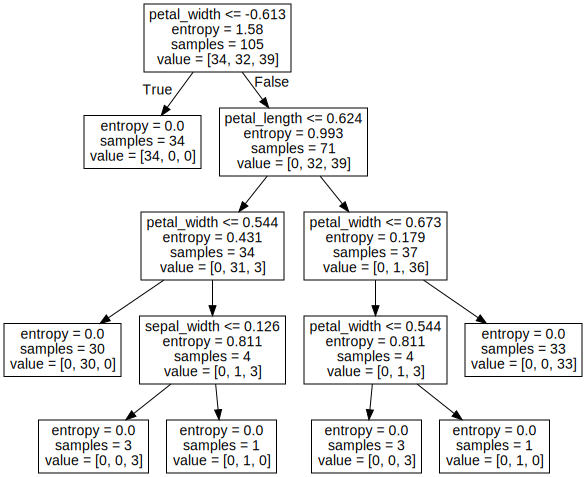

In [23]:
graph=export_graphviz(dt_fit,out_file=None,feature_names=x.columns)
graphviz.Source(graph)

In [36]:
#Decision Tree Regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
drt=DecisionTreeRegressor()
drt_fit=drt.fit(xtrain,ytrain)
drt_predict=drt_fit.predict(xtest)
drt_predict

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0., 2., 1., 0., 2.,
       2., 1., 0., 2., 1., 1., 2., 0., 2., 0., 0.])

In [46]:
metrics.r2_score(ytest,drt_predict)

0.9621848739495799

In [65]:
print('intercept',ls_fit.intercept_)
print('coefficient',ls_fit.coef_)

intercept 1.0476190476190477
coefficient [ 0. -0.  0.  0.]


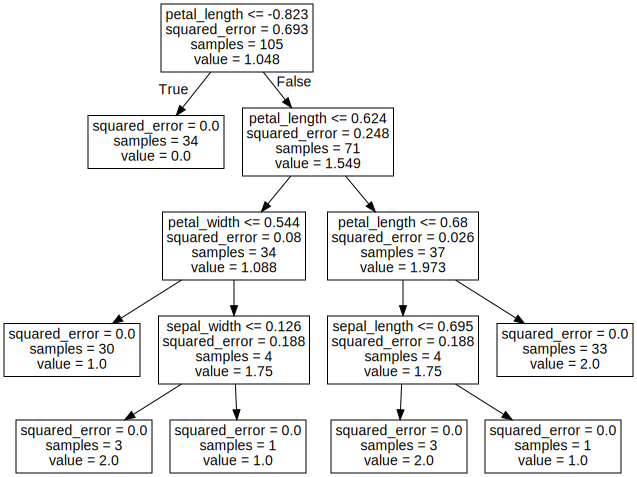

In [68]:
tree=export_graphviz(drt_fit,out_file=None,feature_names=x.columns)
graphviz.Source(tree)

In [95]:
#Extra random tree

In [97]:
from sklearn.ensemble import ExtraTreesClassifier

In [100]:
etc=ExtraTreesClassifier(n_estimators=20)
etc_fit=etc.fit(xtrain,ytrain)
etc_predict=etc_fit.predict(xtest)
etc_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [101]:
print('f1_score:',metrics.f1_score(ytest,etc_predict,average=None))
print('accuracy_score:',metrics.accuracy_score(ytest,etc_predict))
print('confusion_matrix:',metrics.confusion_matrix(ytest,etc_predict))

f1_score: [1.         0.97142857 0.95652174]
accuracy_score: 0.9777777777777777
confusion_matrix: [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [43]:
#Random Forest classification

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc=RandomForestClassifier(n_estimators=20)
rfc_fit=rfc.fit(xtrain,ytrain)
rfc_predict=rfc_fit.predict(xtest)
rfc_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [32]:
print('f1_score:',metrics.f1_score(ytest,rfc_predict,average=None))
print('accuracy_score:',metrics.accuracy_score(ytest,rfc_predict))
print('confusion_matrix:',metrics.confusion_matrix(ytest,rfc_predict))

f1_score: [1.         0.97142857 0.95652174]
accuracy_score: 0.9777777777777777
confusion_matrix: [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [76]:
#Random Forest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rfr=RandomForestRegressor()
rfr_fit=rfr.fit(xtrain,ytrain)
rfr_predict=rfr_fit.predict(xtest)
rfr_predict

array([2.  , 1.02, 0.  , 2.  , 0.  , 2.  , 0.  , 1.  , 1.05, 1.  , 1.84,
       1.  , 1.01, 1.01, 1.01, 0.  , 1.01, 1.  , 0.  , 0.  , 1.86, 1.01,
       0.  , 0.  , 1.81, 0.  , 0.  , 1.  , 1.04, 0.  , 2.  , 1.02, 0.  ,
       1.81, 2.  , 1.  , 0.  , 1.91, 1.01, 1.  , 2.  , 0.  , 2.  , 0.  ,
       0.  ])

In [79]:
metrics.r2_score(ytest,rfr_predict)

0.9640378151260505

In [47]:
#Lasso Regression

In [49]:
from sklearn.linear_model import Lasso

In [52]:
ls=Lasso(alpha=1.0)
ls_fit=ls.fit(xtrain,ytrain)
ls_predict=ls_fit.predict(xtest)
ls_predict

array([1.04761905, 1.04761905, 1.04761905, 1.04761905, 1.04761905,
       1.04761905, 1.04761905, 1.04761905, 1.04761905, 1.04761905,
       1.04761905, 1.04761905, 1.04761905, 1.04761905, 1.04761905,
       1.04761905, 1.04761905, 1.04761905, 1.04761905, 1.04761905,
       1.04761905, 1.04761905, 1.04761905, 1.04761905, 1.04761905,
       1.04761905, 1.04761905, 1.04761905, 1.04761905, 1.04761905,
       1.04761905, 1.04761905, 1.04761905, 1.04761905, 1.04761905,
       1.04761905, 1.04761905, 1.04761905, 1.04761905, 1.04761905,
       1.04761905, 1.04761905, 1.04761905, 1.04761905, 1.04761905])

In [62]:
metrics.r2_score(ytest,ls_predict)

-0.04287429257417252

In [63]:
print('intercept',ls_fit.intercept_)
print('coefficient',ls_fit.coef_)

intercept 1.0476190476190477
coefficient [ 0. -0.  0.  0.]


In [69]:
#Ridge Regression

In [70]:
from sklearn.linear_model import Ridge

In [71]:
rg=Ridge(alpha=1.0)
rg_fit=rg.fit(xtrain,ytrain)
rg_predict=rg_fit.predict(xtest)
rg_predict

array([ 2.06708024,  0.98765317, -0.15488655,  1.81834393, -0.02756584,
        2.25673849, -0.02283612,  1.31740439,  1.28658319,  1.11960622,
        1.57704573,  1.30038409,  1.23105673,  1.33329596,  1.34285879,
       -0.05815956,  1.36506377,  1.24218189,  0.05205881, -0.03422545,
        1.80898055,  1.40885799,  0.09406322,  0.04778405,  1.59415342,
       -0.11039456,  0.1534395 ,  1.17497191,  0.93500856,  0.11373791,
        1.72394375,  1.43336579, -0.057295  ,  1.62024491,  1.99793501,
        1.26934406, -0.02715623,  1.5797001 ,  1.29925535,  1.10829893,
        1.85568466, -0.02892205,  1.85811156,  0.22553997, -0.09224552])

In [74]:
metrics.r2_score(ytest,rg_predict)

0.903092703879876

In [75]:
print('intercept:',rg_fit.intercept_)
print('coefficient:',rg_fit.coef_)

intercept: 1.0476190476190477
coefficient: [-0.10693761 -0.02293533  0.43606457  0.45504386]


In [83]:
#SVM

In [85]:
from sklearn.svm import SVC

In [86]:
svc=SVC(kernel='linear')
svc_fit=svc.fit(xtrain,ytrain)
svc_predict=svc_fit.predict(xtest)
svc_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [92]:
print('f1_score',metrics.f1_score(ytest,svc_predict,average=None))
print('accuracy_score:',metrics.accuracy_score(ytest,svc_predict))
print('confusion_matrix:',metrics.confusion_matrix(ytest,svc_predict))

f1_score [1.         0.97142857 0.95652174]
accuracy_score: 0.9777777777777777
confusion_matrix: [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [102]:
#Gradient Boosting Classifier

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
gbc=GradientBoostingClassifier()
gbc_fit=gbc.fit(xtrain,ytrain)
gbc_predict=gbc_fit.predict(xtest)
gbc_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [106]:
print('f1_score',metrics.f1_score(ytest,gbc_predict,average=None))
print('accuracy_score:',metrics.accuracy_score(ytest,gbc_predict))
print('confusion_matrix:',metrics.confusion_matrix(ytest,gbc_predict))

f1_score [1.         0.97142857 0.95652174]
accuracy_score: 0.9777777777777777
confusion_matrix: [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [108]:
#Gradient Boosting Regression

In [111]:
from sklearn.ensemble import GradientBoostingRegressor

In [112]:
gbr=GradientBoostingRegressor()
gbr_fit=gbr.fit(xtrain,ytrain)
gbr_predict=gbr_fit.predict(xtest)
gbr_predict

array([ 2.01135659e+00,  1.11808240e+00, -6.00366927e-04,  2.00129026e+00,
       -6.00366927e-04,  2.01384021e+00, -6.00366927e-04,  9.63817478e-01,
        9.49513150e-01,  1.00329420e+00,  1.88539261e+00,  9.60495405e-01,
        1.00835954e+00,  1.09340115e+00,  1.00835954e+00,  2.23756360e-03,
        1.23550896e+00,  1.00013609e+00,  3.43005067e-03, -6.00366927e-04,
        1.97678871e+00,  9.95540186e-01, -6.00366927e-04,  3.84605430e-03,
        1.86392098e+00, -6.00366927e-04, -6.00366927e-04,  1.00259616e+00,
        9.86238289e-01, -6.00366927e-04,  2.00569263e+00,  9.95540186e-01,
       -6.00366927e-04,  1.81750049e+00,  2.00248018e+00,  9.98013684e-01,
       -6.00366927e-04,  2.21507274e+00,  8.82981621e-01,  9.98977823e-01,
        1.98713247e+00, -1.77173903e-03,  2.00076711e+00, -6.00366927e-04,
       -6.00366927e-04])

In [113]:
metrics.r2_score(ytest,gbr_predict)

0.9379794067499129

In [115]:
#elastin net regression

In [118]:
from sklearn.linear_model import ElasticNet

In [120]:
en=ElasticNet(alpha=1.0)
en_fit=en.fit(xtrain,ytrain)
en_predict=en_fit.predict(xtest)
en_predict

array([1.31790721, 1.02219894, 0.72656095, 1.29856231, 0.73298582,
       1.391805  , 0.73620997, 1.14754259, 1.13789356, 1.07042065,
       1.18929257, 1.13469283, 1.09932088, 1.14111771, 1.13146868,
       0.71691192, 1.13469283, 1.08004625, 0.74263485, 0.75228388,
       1.24076185, 1.13469283, 0.75868533, 0.72656095, 1.20218917,
       0.70086144, 0.79083313, 1.08969528, 0.97722481, 0.7715585 ,
       1.2471633 , 1.13469283, 0.73298582, 1.20861404, 1.31788379,
       1.08006968, 0.76190948, 1.18931599, 1.11541821, 1.05434675,
       1.29538501, 0.72013607, 1.30183331, 0.80370631, 0.73298582])

In [122]:
metrics.r2_score(ytest,en_predict)

0.4345675797534788

In [124]:
#XGBoost

In [128]:
from xgboost import XGBRegressor

In [130]:
xgb=XGBRegressor()
xgb_fit=xgb.fit(xtrain,ytrain)
xgb_predict=xgb.predict(xtest)
xgb_predict

array([1.9994687e+00, 1.0005111e+00, 4.1963169e-05, 1.9999948e+00,
       4.1963169e-05, 2.0003233e+00, 4.1963169e-05, 8.3518004e-01,
       7.2260618e-01, 1.0104479e+00, 1.7256974e+00, 9.8970747e-01,
       1.0102925e+00, 8.9732832e-01, 1.0043033e+00, 4.1963169e-05,
       1.3247669e+00, 1.0000658e+00, 1.1614057e-04, 4.1963169e-05,
       1.9829525e+00, 1.1830946e+00, 4.1963169e-05, 2.0660914e-04,
       1.9593543e+00, 4.1963169e-05, 4.1963169e-05, 9.6715736e-01,
       9.9973166e-01, 4.1963169e-05, 1.9998410e+00, 1.1830946e+00,
       4.1963169e-05, 1.9317387e+00, 2.0000577e+00, 9.5138234e-01,
       4.1963169e-05, 1.9693784e+00, 1.1570969e+00, 1.0000658e+00,
       1.9999861e+00, 4.1963169e-05, 2.0000215e+00, 4.1963169e-05,
       4.1963169e-05], dtype=float32)

In [132]:
metrics.r2_score(ytest,xgb_predict)

0.949434522786678